# TF1 vs TF2

In [ ]:
import tensorflow as tf
W = tf.Variable(tf.ones(shape=(2,2)), 
                name="W")
b = tf.Variable(tf.zeros(shape=(2)), 
                name="b")

def model(x):
    return W * x + b
out_a = model([1,0])
print(out_a)

tf.Tensor(
[[1. 0.]
 [1. 0.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
in_a = tf.placeholder(dtype=tf.float32, shape=(2))
def model(x):
  with tf.variable_scope("matmul"):
    W = tf.get_variable("W", 
          initializer=tf.ones(shape=(2,2)))
    b = tf.get_variable("b", 
          initializer=tf.zeros(shape=(2)))
    return x * W + b
out_a = model(in_a)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  outs = sess.run([out_a], 
                  feed_dict={in_a: [1, 0]})
  print(outs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[array([[1., 0.],
       [1., 0.]], dtype=float32)]


# Perceptron

## Vector-based

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def perceptron(X, T, lr=0.1, w=None):
  X = np.hstack((np.array(X), np.ones((len(X), 1)))) # Homogeneous coordinates
  if w is None:
    w = X[np.random.randint(0, len(X))].copy()
  done = False
  while not done:
    done = True
    for i, x in enumerate(X):
      if T[i] * np.dot(x, w) <= 0:
        w += lr * x * T[i]
        done = False
  return w

In [ ]:
def plot_hyperplane2d(X, T, w):
  X = np.array(X)
  T = np.array(T)
  plt.plot(X[T==1, 0], X[T==1, 1], 'go')
  plt.plot(X[T==-1, 0], X[T==-1, 1], 'ro')
  xlim = plt.gca().get_xlim()
  slope = -w[0] / w[1]
  bias = -w[-1] / w[1]
  plt.plot(xlim, [xlim[0] * slope + bias, xlim[1] * slope + bias], 'b')

In [ ]:
# OR problem
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
T = [1, 1, 1, -1]

In [ ]:
# AND problem
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
T = [1, -1, -1, -1]

In [ ]:
# XOR problem
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
T = [-1, 1, 1, -1]

[ 0.3  0.3 -0.3]


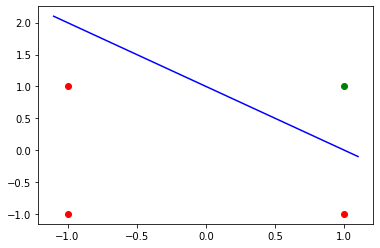

In [ ]:
w = perceptron(X, T, lr=1e-1)
print(w)
plot_hyperplane2d(X, T, w)

## Gradient-based

In [ ]:
import tensorflow as tf

d_in = (2,)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

In [ ]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 1]
history = model.fit(X, Y, epochs=500)

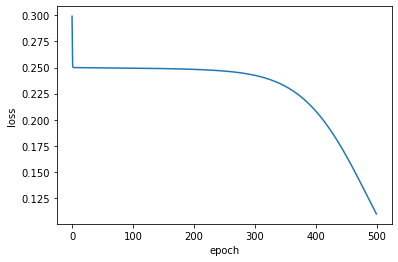

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('loss.png')
plt.show()

In [ ]:
Z = model.predict(X)
print(tf.round(Z))

tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


# Nonlinear Problem with Perceptron

In [ ]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]
history = model.fit(X, Y, epochs=500)

# MLP with TF

In [ ]:
import tensorflow as tf

d_in = (2,)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=1.5))

# Activation Functions

In [ ]:
import numpy as np
x = tf.constant(np.arange(-10, 10, 0.01))
y = tf.keras.activations.hard_sigmoid(x)

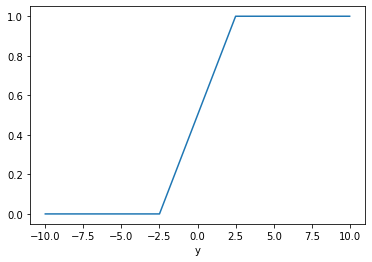

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y.numpy())
plt.xlabel('x')
plt.xlabel('y')
#plt.savefig('act.png')
plt.show()

## Softmax

In [ ]:
x = tf.constant(np.random.rand(5, 2))
y = tf.keras.activations.softmax(x)
print(y)

tf.Tensor(
[[0.38076859 0.61923141]
 [0.5712223  0.4287777 ]
 [0.48331232 0.51668768]
 [0.42837592 0.57162408]
 [0.62312166 0.37687834]], shape=(5, 2), dtype=float64)


# TensorFlow 2 without Keras

## Tensor Operations

In [ ]:
A = tf.constant(np.array([[1, 2, 3]]))
B = tf.Variable(np.array([[1, 2, 3]]))
A = A.numpy()
B = B.numpy()

[[1 2 3]]
[[1 2 3]]


In [ ]:
A = tf.ones((2, 3), dtype=tf.float32)
print(A)
# tf.Tensor(
# [[1. 1. 1.]
#  [1. 1. 1.]], shape=(2, 3), dtype=float32)
B = tf.zeros((2, 3), dtype=tf.int32)
print(B)
# tf.Tensor(
# [[0 0 0]
#  [0 0 0]], shape=(2, 3), dtype=int32)
C = tf.eye(2)
print(C)
# tf.Tensor(
# [[1. 0.]
#  [0. 1.]], shape=(2, 2), dtype=float32)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
A = tf.constant([[1, 2, 3]])
B = tf.Variable([[4, 5, 6]])
C = tf.concat(values=[A, B], axis=0)
D = tf.concat(values=[A, B], axis=1)
print(C)
print(D)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor([[1 2 3 4 5 6]], shape=(1, 6), dtype=int32)


In [ ]:
A = tf.ones((4, 3))
print(A.shape)
# (4, 3)

A = tf.transpose(A)
print(A.shape)
# (4, 3)

(4, 3)
(3, 4)


In [ ]:
A = tf.ones((4, 3))
print(A.shape)
# (4, 3)

A = tf.reshape(A, (6, 2))
print(A.shape)
# (6, 2)

(4, 3)
(6, 2)


In [ ]:
A = tf.ones((2, 3))
print(A.dtype)
# <dtype: 'float32'>

A = tf.cast(A, tf.int32)
print(A.dtype)
# <dtype: 'int32'>

<dtype: 'float32'>
<dtype: 'int32'>


In [ ]:
A = tf.constant([[1, 2], [3, 4]])
B = tf.constant([[5, 6], [7, 8]])
print(A * B)
# tf.Tensor(
# [[ 5 12]
#  [21 32]], shape=(2, 2), dtype=int32)
print(A @ B)
# tf.Tensor(
# [[19 22]
#  [43 50]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [ ]:
A = tf.constant([[1, 2], [2, 1]], dtype=tf.float32)
detA = tf.linalg.det(A)
print(detA)
# tf.Tensor(-3.0, shape=(), dtype=float32)
vl, vt = tf.linalg.eig(A)
print(vl)
# tf.Tensor([-0.99999994+0.j  2.9999998 +0.j], shape=(2,), dtype=complex64)
print(vt)
# tf.Tensor(
# [[-0.7071068+0.j -0.7071068+0.j]
#  [ 0.7071068+0.j -0.7071068+0.j]], shape=(2, 2), dtype=complex64)

tf.Tensor(-3.0, shape=(), dtype=float32)
tf.Tensor([-0.99999994+0.j  2.9999998 +0.j], shape=(2,), dtype=complex64)
tf.Tensor(
[[-0.7071068+0.j -0.7071068+0.j]
 [ 0.7071068+0.j -0.7071068+0.j]], shape=(2, 2), dtype=complex64)


In [ ]:
B = tf.Variable([[1, 2], [2, 1]], dtype=tf.float32)

In [ ]:
type(B)
# tensorflow.python.ops.resource_variable_ops.ResourceVariable

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [ ]:
type(A)
# tensorflow.python.framework.ops.EagerTensor

tensorflow.python.framework.ops.EagerTensor

## Automatic Differentiation

In [ ]:
x = tf.Variable(3.0)
# y = x^2 + 2x + 1
with tf.GradientTape() as t:
  y = x**2 + 2*x + 1
# dy = 2x + 2
dy_dx = t.gradient(y, x)
print(dy_dx)
# tf.Tensor(8.0, shape=(), dtype=float32)

tf.Tensor(8.0, shape=(), dtype=float32)


## Gradient Tapes

In [ ]:
x = tf.constant(3.0)
# y = x^2 + 2x + 1
with tf.GradientTape() as t:
  t.watch(x)
  y = x**2 + 2*x + 1
# dy = 2x + 2
dy_dx = t.gradient(y, x)
print(dy_dx)
# tf.Tensor(8.0, shape=(), dtype=float32)

tf.Tensor(8.0, shape=(), dtype=float32)


In [ ]:
a = tf.Variable(3.0, name='a') # not in scope
x = tf.Variable(3.0, name='x')
y = tf.Variable(3.0, name='y')

with tf.GradientTape() as t:
  z = x**2 + y**2 

t.watched_variables()
# (<tf.Variable 'x:0' shape=() dtype=float32, numpy=3.0>,
#  <tf.Variable 'y:0' shape=() dtype=float32, numpy=3.0>)

(<tf.Variable 'x:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Variable 'y:0' shape=() dtype=float32, numpy=3.0>)

In [ ]:
x = tf.Variable(3.0, name='x')
y = tf.Variable(3.0, name='y')

with tf.GradientTape(persistent=True) as t:
  y = x**2
  z = y**2

dz_dy = t.gradient(z, y)
print(dy_dx)
# tf.Tensor(8.0, shape=(), dtype=float32)
dz_dx = t.gradient(z, x)
print(dz_dx)
# tf.Tensor(108.0, shape=(), dtype=float32)

tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(108.0, shape=(), dtype=float32)


In [ ]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as t:
  z = y**2
print(t.gradient(x, y))
# None

None


In [ ]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as t:
  z = y**2
print(t.gradient(x, y, unconnected_gradients=tf.UnconnectedGradients.ZERO))
# tf.Tensor(0.0, shape=(), dtype=float32)

tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
def f(x):
  if x < -3:
    return 0.1 * x
  if -3 <= x <= 2:
    return 0.5 * x + 1.2
  if x > 2:
    return 0.1 * x + 2

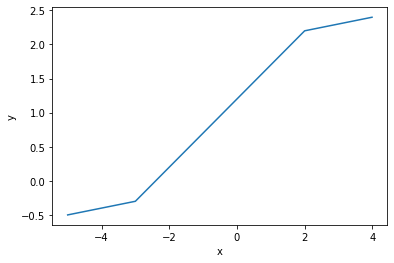

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-5, 4, 0.01)
y = [f(i) for i in x] 
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('pf.png')
plt.show()

In [ ]:
def df(x):
  with tf.GradientTape() as t:
    y = f(x)
  return t.gradient(y, x)

x1 = tf.Variable(-4.)
x2 = tf.Variable(1.)
x3 = tf.Variable(3.)
print(df(x1).numpy()) # 0.1
print(df(x2).numpy()) # 0.5
print(df(x3).numpy()) # 0.1

0.1
0.5
0.1


## Custom Gradient

In [ ]:
@tf.custom_gradient
def hardlim(x):
  if x >= 0:
    y = tf.clip_by_value(x, 1., 1.)
  else:
    y = tf.clip_by_value(x, 0., 0.)
  def grad(dy):
    dy = tf.constant(0.)
    if x == 0.:
      dy = tf.constant(np.inf)
    return dy
  return  y, grad

x = tf.Variable(-1.)
with tf.GradientTape() as t:
  y = hardlim(x)
print(y, t.gradient(y, x))

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Regression

## Linear Regression

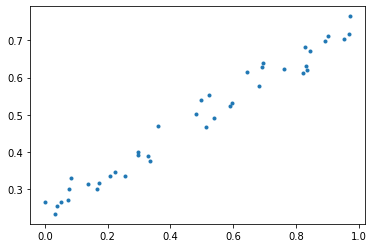

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(40)
y = 0.5 * x + 0.2 + 0.1*np.random.rand(40)
plt.plot(x, y, '.')
#plt.savefig('regress.png')
plt.show()

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0362
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0197
Epoch 11/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 12/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 13/200
2/2 [==============================] - 0s 2ms/st

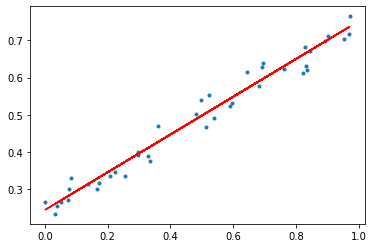

In [ ]:
import tensorflow as tf

d_in = (1,)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=d_in))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

model.fit(x, y, epochs=200)

z = model.predict(x)
plt.plot(x, y, '.')
plt.plot(x, z[:,0], 'r')
plt.savefig('regr.png')
plt.show()

## Non-linear Regression

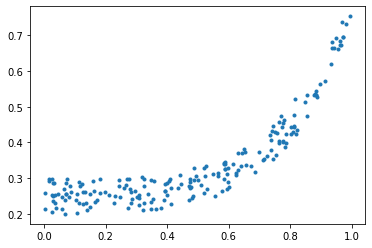

In [ ]:
x = np.random.rand(200)
y = 0.5 * x**4 + 0.2 + 0.1*np.random.rand(200)
plt.plot(x, y, '.')
plt.savefig('regress.png')
plt.show()

Epoch 1/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 2/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 5/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 6/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 7/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 8/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 9/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 10/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 11/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 12/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 13/400
7/7 [==============================] - 0s 1ms/st

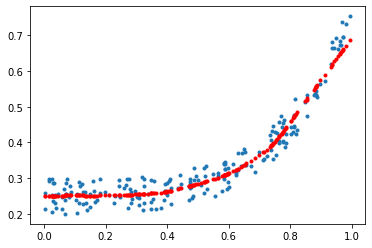

In [ ]:
import tensorflow as tf

d_in = (1,)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=d_in, 
                                activation='relu'))
model.add(tf.keras.layers.Dense(200,
                                activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

model.fit(x, y, epochs=400)

z = model.predict(x)
plt.plot(x, y, '.')
plt.plot(x, z[:,0], '.r')
plt.savefig('regr.png')
plt.show()

# MNIST

In [ ]:
import tensorflow as tf
import numpy as np
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

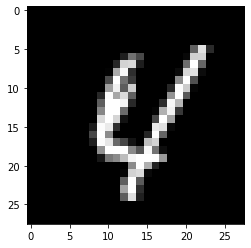

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[700], cmap='gray')
plt.savefig('mnist.png')
plt.show()

In [ ]:
Xtrain = Xtrain.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)

## One-Hot Encoder

In [ ]:
def onehot(Y, nclass=10):
  Y_ = np.zeros((Y.shape[0], nclass))
  for i, y in enumerate(Y):
    Y_[i, Y[i]] = 1
  return Y_

In [ ]:
Ytrain = onehot(Ytrain)
Ytest = onehot(Ytest)

## MLP with MNIST

In [ ]:
d_in = (Xtrain.shape[1],)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=d_in, 
                                activation='relu'))
model.add(tf.keras.layers.Dense(200,
                                activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

model.fit(Xtrain / 255., Ytrain, epochs=50, validation_data=(Xtest, Ytest))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0903 - val_loss: 0.1690
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0897 - val_loss: 0.1655
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0891 - val_loss: 0.1609
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0885 - val_loss: 0.1551
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0879 - val_loss: 0.1492
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - val_loss: 0.1439
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0865 - val_loss: 0.1398
Epoch 8/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0858 - val_loss: 0.1363
Epoch 9/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0850 - val_loss: 0.1333
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.084

In [ ]:
Z = model.predict(Xtest / 255.)
print(np.sum(Z.argmax(axis=1) == Ytest.argmax(axis=1)) / len(Ytest))

0.8234


# Sobel Edge Detection

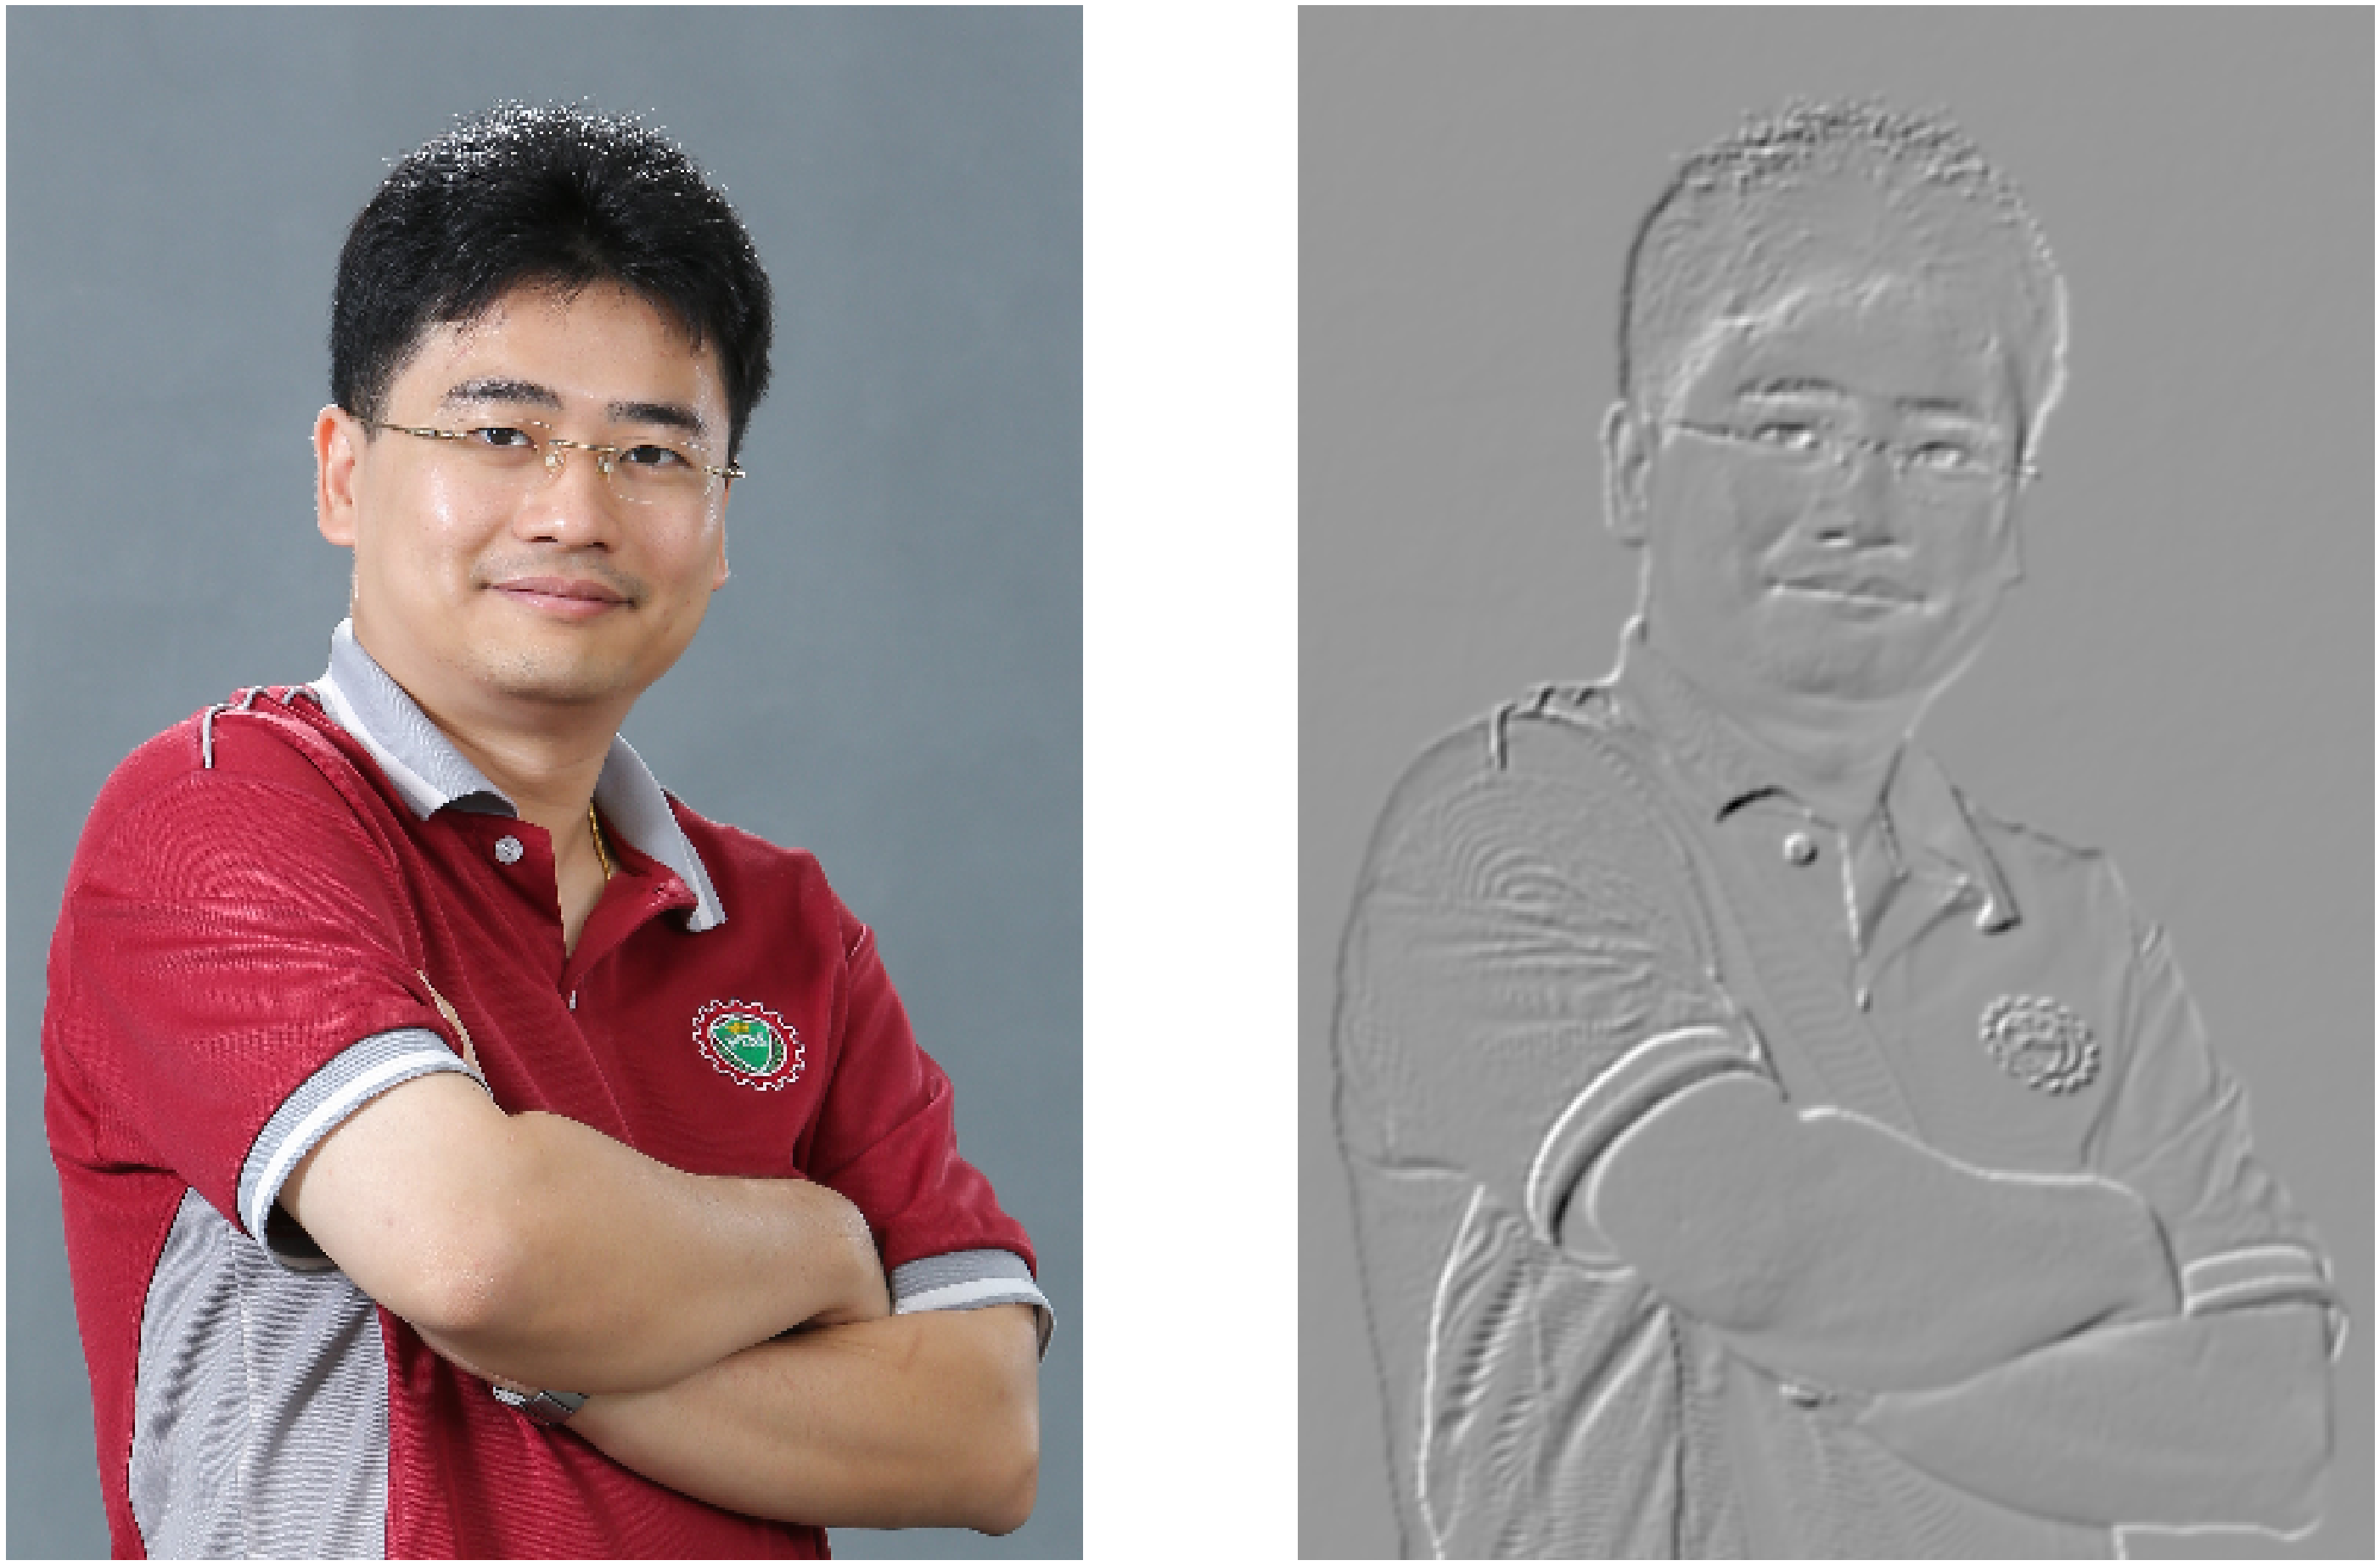

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ton.jpg')
img = cv2.resize(img, None, fx=0.2, fy=0.2)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=7)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=7)
edge = sobelx+sobely
plt.figure(figsize=(50,50))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edge, cmap='gray')
plt.axis('off')
plt.savefig('ton.png')
plt.show()

# CPU vs GPU

In [ ]:
import tensorflow as tf
import numpy as np
import time

with tf.device('/CPU:0'):
    start = time.time()
    for i in range(100):
      A = tf.random.uniform((100000,))
      m = tf.reduce_mean(A)
    print(time.time() - start)

0.08583879470825195


In [ ]:
import tensorflow as tf
import numpy as np
import time

with tf.device('/GPU:0'):
    start = time.time()
    for i in range(100):
      A = tf.random.uniform((100000,))
      m = tf.reduce_mean(A)
    print(time.time() - start)

0.02875685691833496


# LeNet5

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), input_shape=(32, 32, 1), activation='relu'))
model.add(keras.layers.MaxPool2D()) 
model.add(keras.layers.Conv2D(16, (5,5), activation='relu')) 
model.add(keras.layers.MaxPool2D()) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

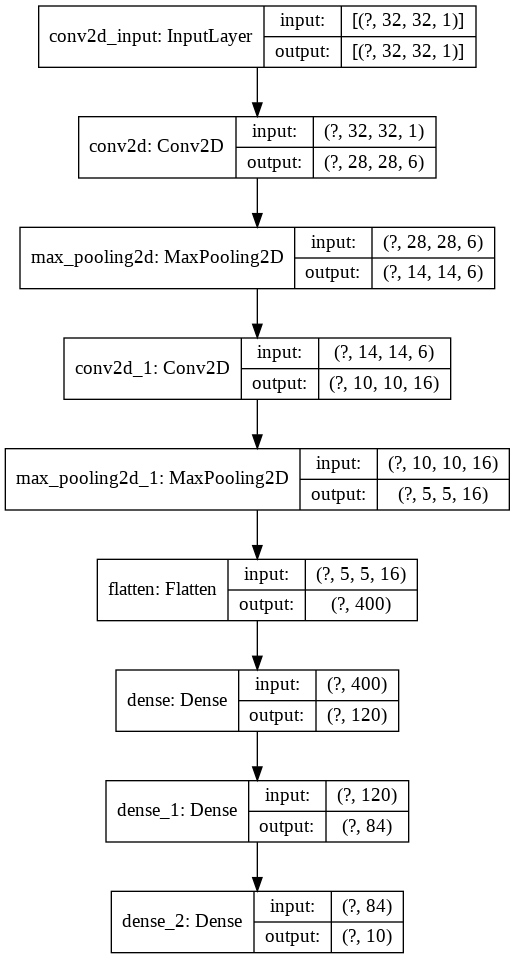

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:,None] / 255.
Xtest = Xtest[:,:,:,None] / 255.
Xtrain = tf.image.resize(Xtrain, (32,32))
Xtest = tf.image.resize(Xtest, (32,32))

In [ ]:
model.fit(Xtrain, Ytrain, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5795
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1313
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0928
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0755
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0643
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0570
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0467
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390
Epoch 11/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0360
Epoch 12/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338
E

In [ ]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)

0.988

In [ ]:
!nvidia-smi

Sun Jul 26 08:23:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Transfer Learning

In [ ]:
!wget https://github.com/kittinan/thai-handwriting-number/raw/master/src/thainumber_28.pkl

In [ ]:
import pickle
data = pickle.load(open('thainumber_28.pkl','rb'))
X = data['X']
Y = data['Y']

In [ ]:
print(X.shape)
print(len(np.unique(Y)))

(1665, 28, 28, 1)
10


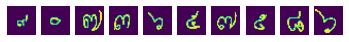

In [ ]:
n = 10
for j, i in enumerate(np.random.choice(len(X), n)):
  plt.subplot(1,n,j+1)
  plt.imshow(X[i,:,:,0])
  plt.axis('off')
plt.savefig('thai.png')
plt.show()

In [ ]:
from skimage.transform import resize

_X = []
for x in X:
  _X.append(resize(x, (32, 32)))
X = np.array(_X)
del _X

In [ ]:
idx = np.random.permutation(np.arange(len(X)))
split = 1665 * 8 // 10
train_idx = idx[:split]
test_idx = idx[split:]
Xtrain, Ytrain = X[train_idx] / 255., Y[train_idx].astype(np.int)
Xtest, Ytest = X[test_idx] /255., Y[test_idx].astype(np.int)

In [ ]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)
# 0.09009009009009009

0.09009009009009009

In [ ]:
model.fit(Xtrain, Ytrain, epochs=25)

Epoch 1/25
42/42 [==============================] - 0s 4ms/step - loss: 2.9954
Epoch 2/25
42/42 [==============================] - 0s 4ms/step - loss: 1.3675
Epoch 3/25
42/42 [==============================] - 0s 4ms/step - loss: 1.0527
Epoch 4/25
42/42 [==============================] - 0s 4ms/step - loss: 0.8622
Epoch 5/25
42/42 [==============================] - 0s 4ms/step - loss: 0.7285
Epoch 6/25
42/42 [==============================] - 0s 4ms/step - loss: 0.6142
Epoch 7/25
42/42 [==============================] - 0s 4ms/step - loss: 0.5309
Epoch 8/25
42/42 [==============================] - 0s 3ms/step - loss: 0.4569
Epoch 9/25
42/42 [==============================] - 0s 4ms/step - loss: 0.4020
Epoch 10/25
42/42 [==============================] - 0s 4ms/step - loss: 0.3539
Epoch 11/25
42/42 [==============================] - 0s 4ms/step - loss: 0.3066
Epoch 12/25
42/42 [==============================] - 0s 4ms/step - loss: 0.2776
Epoch 13/25
42/42 [==============================

In [ ]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)
# 0.7867867867867868

0.7867867867867868

# VGG16

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(64,(3,3), padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss=keras.losses.sparse_categorical_crossentropy)

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:,None] / 255.
Xtest = Xtest[:,:,:,None] / 255.
# Xtrain = tf.image.resize(Xtrain, (224,224))
# Xtrain = tf.image.grayscale_to_rgb(Xtrain)
# Xtest = tf.image.resize(Xtest, (224,224))
# Xtest = tf.image.grayscale_to_rgb(Xtest)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator()
batch = 128
datagen.fit(Xtrain)
num_batch = len(Xtrain) / batch
Progbar = keras.utils.Progbar(num_batch)
for epoch in range(50):
  batches = 0
  for x, y in datagen.flow(Xtrain, Ytrain, batch_size=batch):
    x = tf.image.resize(x, (224,224))
    x = tf.image.grayscale_to_rgb(x)
    history = model.fit(x, y, verbose=0)
    batches += 1
    Progbar.update(batches, values=[('loss', history.history['loss'][0])])
    if batches >= num_batch:
      print(epoch)
      break

469/468 [==============================] - 456s 973ms/step - loss: 0.1140
0
469/468 [==============================] - 907s 2s/step - loss: 0.0763
1
469/468 [==============================] - 1357s 3s/step - loss: 0.0596
2
469/468 [==============================] - 1807s 4s/step - loss: 0.0497
3
469/468 [==============================] - 2257s 5s/step - loss: 0.0430
4
469/468 [==============================] - 2707s 6s/step - loss: 0.0379
5
469/468 [==============================] - 3156s 7s/step - loss: 0.0341
6
469/468 [==============================] - 3606s 8s/step - loss: 0.0309
7
469/468 [==============================] - 4055s 9s/step - loss: 0.0284
8
469/468 [==============================] - 4505s 10s/step - loss: 0.0263
9
469/468 [==============================] - 4954s 11s/step - loss: 0.0245
10
469/468 [==============================] - 5403s 12s/step - loss: 0.0229
11
469/468 [==============================] - 5851s 12s/step - loss: 0.0215
12
469/468 [=====================

## Transfer learning with VGG 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, Model

vgg = VGG16(include_top=False, weights='imagenet')
# fit input
x_in = layers.Input(shape=(32, 32, 1))
x = layers.Conv2D(3, 1)(x_in)
x = vgg(x)
# fit output
x = layers.Flatten()(x)
x = layers.Dense(10, activation='softmax')(x)
model = Model(x_in, x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 3)         6         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 14,719,824
Trainable params: 14,719,824
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Xtrain = tf.image.resize(Xtrain, (32, 32))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1487
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0279
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0198
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0145
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0110
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0051
Epoch 10/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0042


In [ ]:
import numpy as np
Xtest = tf.image.resize(Xtest, (32, 32))
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)
# 0.996

0.996

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# fit output
x = layers.Flatten()(vgg.output)
x = layers.Dense(10, activation='softmax')(x)
model = keras.Model(vgg.input, x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [ ]:
Xtrain = tf.image.grayscale_to_rgb(Xtrain)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1046
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0249
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0166
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0120
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0103
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0063
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0060
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0050
Epoch 10/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0028


In [ ]:
Xtest = tf.image.grayscale_to_rgb(Xtest)
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)
# 0.9951

0.9951

# Autoencoder

## Feature Extraction

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()
X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0
X = X.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
clf = SVC()
clf.fit(X, Y)
Z = clf.predict(Xtest)
print('accuracy rate=', accuracy_score(Ytest, Z))
print('confusion matrix:')
print(confusion_matrix(Ytest, Z))

accuracy rate= 0.9792
confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [ ]:
# 784-392-196-98-196-392-784
inputs=Input(shape=X.shape[1])

en1=layers.Dense(X.shape[1]//2,activation='relu')
en2=layers.Dense(X.shape[1]//4,activation='relu')
en3=layers.Dense(X.shape[1]//8,activation='relu')

de1=layers.Dense(X.shape[1]//4,activation='relu')
de2=layers.Dense(X.shape[1]//2,activation='relu')
de3=layers.Dense(X.shape[1],activation='relu')

outputs=de3(de2(de1(en3(en2(en1(inputs))))))
model=Model(inputs,outputs)
model.compile(loss=losses.MeanSquaredError(),
              optimizer=optimizers.SGD(learning_rate=0.1))
model.fit(X,X,epochs=200)

Epoch 1/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0802
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0667
Epoch 3/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0540
Epoch 4/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0477
Epoch 5/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0438
Epoch 6/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0409
Epoch 7/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0390
Epoch 8/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0371
Epoch 9/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0354
Epoch 10/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0343
Epoch 11/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0332
Epoch 12/200
1875/1875 [==============================] - 6s 3ms/step - lo

In [ ]:
Xencoded = en3(en2(en1(X))).numpy()
print(Xencoded.shape)
clf1 = SVC()
clf1.fit(Xencoded, Y)
Xtestencoded = en3(en2(en1(Xtest))).numpy()
Z1 = clf1.predict(Xtestencoded)
print('accuracy rate=', accuracy_score(Ytest, Z1))
print('confusion matrix:')
print(confusion_matrix(Ytest, Z1))

(60000, 98)
accuracy rate= 0.9511
confusion matrix:
[[ 965    0    1    2    1    4    5    1    1    0]
 [   0 1123    2    2    0    1    4    1    2    0]
 [  10    1  975    5    9    1   11    9   10    1]
 [   1    0   12  956    0   12    1   10   14    4]
 [   1    0    9    0  940    0    5    2    2   23]
 [  10    3    8   20    5  821    8    2   10    5]
 [   7    4    3    2    5    6  927    1    3    0]
 [   1    8   20    3    8    1    0  966    4   17]
 [   5    4    3   14    7   13    8    6  908    6]
 [   5    4    1   12   32    6    1   10    8  930]]


## Reconstructor

In [ ]:
Xtestencoded=en3(en2(en1(Xtest))).numpy()

In [ ]:
Recon=de3(de2(de1(Xtestencoded))).numpy()

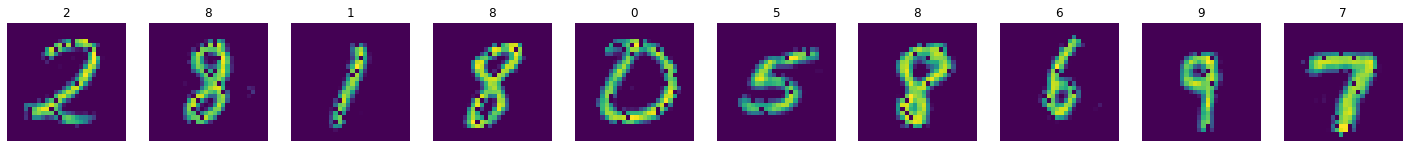

In [ ]:
n = 10
plt.figure(figsize=(25,25))
for j,i in enumerate(np.random.randint(0,len(Recon),n)):
  plt.subplot(1,n,j+1)
  plt.imshow(Recon[i].reshape(28, 28))
  plt.title(Ytest[i])
  plt.axis('off')
plt.show()

## Generator

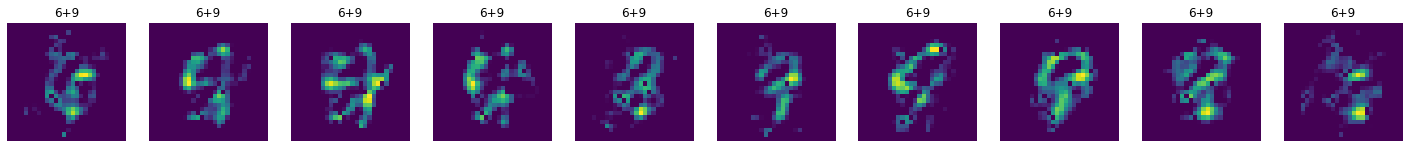

In [ ]:
p=[6,9]
p1=np.where(Ytest==p[0])[0]
p2=np.where(Ytest==p[1])[0]
n=10
plt.figure(figsize=(25,25))
for i in range(n):
  temp=Xtestencoded[[np.random.choice(p1),np.random.choice(p2)]]
  x=np.hstack((temp[0,:temp.shape[1]//2],
                 temp[1,temp.shape[1]//2:])).reshape(1,temp.shape[1])
  Recon=de3(de2(de1(x))).numpy()
  Recon=Recon.reshape((len(Recon),28,28))[0]
  plt.subplot(1,n,i+1)
  plt.imshow(Recon)
  plt.title(str(p[0])+'+'+str(p[1]))
  plt.axis('off')
plt.show()

## Autoenocoder with CNN

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()

X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0

In [ ]:
inputs = Input(shape=(*X.shape[1:], 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
encoder = Model(inputs, encoded, name='encoder')

encoded_inputs = Input(shape=encoded.shape[1:])
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_inputs)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decoder = Model(encoded_inputs, decoded, name='decoder')

model = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
model.compile(optimizer='sgd', loss='mse')

In [ ]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 4, 4, 8)           1904      
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X[:,:,:,None], X[:,:,:,None], epochs=50)

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1064
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0698
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0567
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0505
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0463
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0435
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0415
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0400
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0386
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0374
Epoch 11/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363
Epoch 12/50
1875/1875 [==============================] - 11s 6ms/step - lo

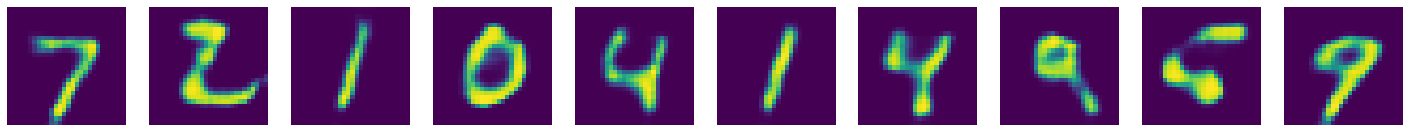

In [ ]:
Z = model(Xtest)
n = 10
plt.figure(figsize=(25, 25))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(Z[i][:,:,0])
  plt.axis('off')
plt.show()

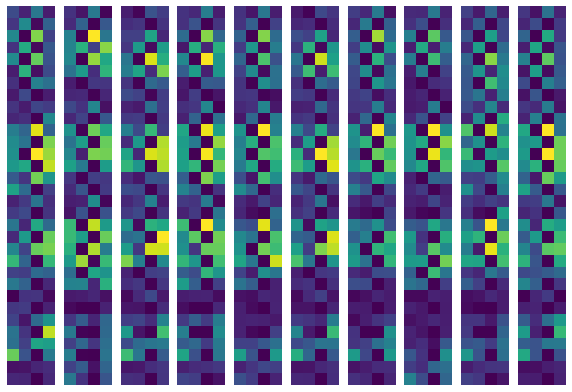

In [ ]:
Z = encoder(Xtest)
n = 10
plt.figure(figsize=(10, 10))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(Z[i].numpy().reshape(32, -1))
  plt.axis('off')
plt.show()

## Denoising

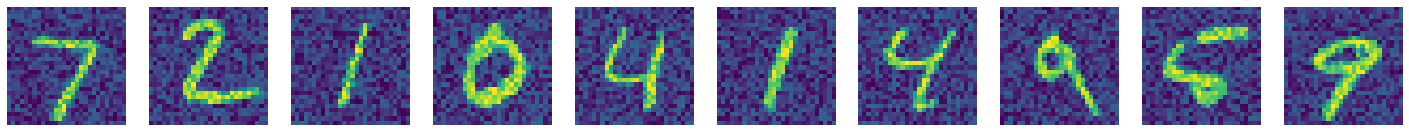

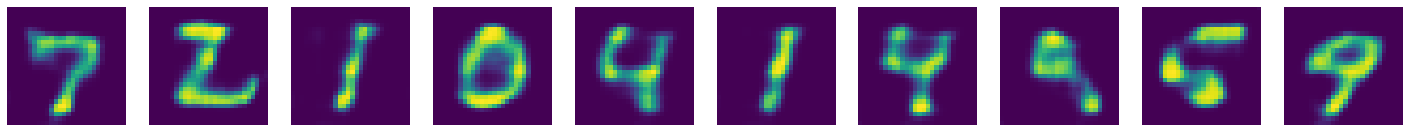

In [ ]:
Xnoise = Xtest + 0.5 * np.random.rand(*Xtest.shape)
Xnoise /= Xnoise.max()
Z = model(Xnoise)
n = 10
plt.figure(figsize=(25, 25))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(Xnoise[i])
  plt.axis('off')
plt.show()

plt.figure(figsize=(25, 25))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(Z[i][:,:,0])
  plt.axis('off')
plt.show()

# SegNet

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Reshape, Permute
from matplotlib import pyplot as plt

img_w = 256
img_h = 256
kernel = 3

autoencoder = [
    # Encode
    Conv2D(64, kernel, padding='same', input_shape=( img_h, img_w,1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(128, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(256, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(512, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    # Decode
    Conv2D(512, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    UpSampling2D(),
    Conv2D(256, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    UpSampling2D(),
    Conv2D(128, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    UpSampling2D(),
    Conv2D(64, kernel, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(1, 1, 1, padding='same'),
    BatchNormalization(),
    Activation('relu'),
 ]
segnet = models.Sequential(autoencoder)
segnet.compile(loss='mse', optimizer='sgd')

In [ ]:
segnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 128)     0

In [ ]:
import os

path_train = '/content/drive/My Drive/Lung Segmentation Dataset/train'
Xtrain = []
Ytrain = []
for fn in os.listdir(path_train):
  if fn.endswith('jpg'):
    Xtrain.append(plt.imread(os.path.join(path_train, fn)))
    Ytrain.append(plt.imread(os.path.join(path_train, fn + '-msk.png')))
Xtrain = np.array(Xtrain)[:,:,:,None]
Ytrain = np.array(Ytrain)[:,:,:,None]

In [ ]:
segnet.fit(Xtrain, Ytrain, epochs=200)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 10/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 12/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 13/50
1/1 [==============================] - 0s 1ms/step - loss: 0.

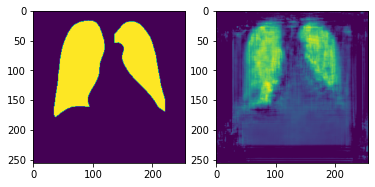

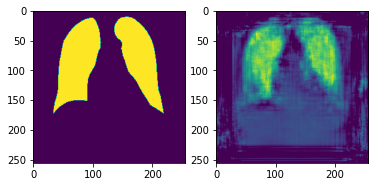

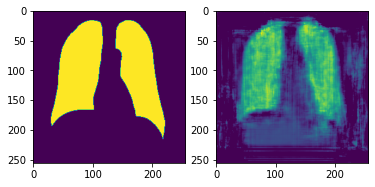

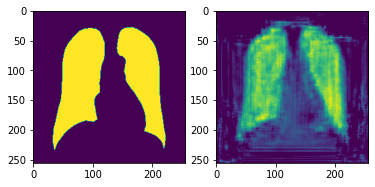

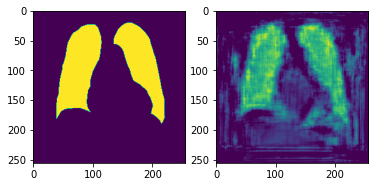

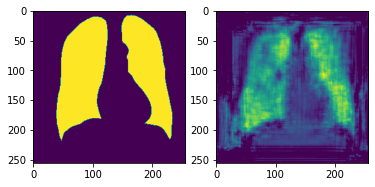

In [ ]:
Ztrain = segnet(Xtrain)
for i in range(len(Ztrain)):
  plt.subplot(1,2,1)
  plt.imshow(Ytrain[i][:,:,0])
  plt.subplot(1,2,2)
  plt.imshow(Ztrain[i][:,:,0])
 # plt.imshow(Ztrain[i].numpy().argmax(axis=2))
  plt.show()

In [ ]:
path_test = '/content/drive/My Drive/Lung Segmentation Dataset/test'
Xtest = []
Ytest = []
for fn in os.listdir(path_test):
  if fn.endswith('jpg'):
    Xtest.append(plt.imread(os.path.join(path_test, fn)))
    Ytest.append(plt.imread(os.path.join(path_test, fn + '-msk.png')))
Xtest = np.array(Xtest)[:,:,:,None]
Ytest = np.array(Ytest)[:,:,:,None]

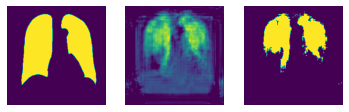

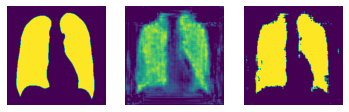

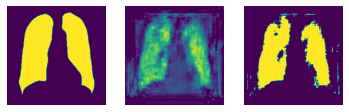

In [ ]:
Ztest = segnet(Xtest)
for i in range(len(Ztest)):
  plt.subplot(1,3,1)
  plt.imshow(Ytest[i][:,:,0])
  plt.axis('off')
  plt.subplot(1,3,2)
  plt.imshow(Ztest[i][:,:,0])
  plt.axis('off')
  plt.subplot(1,3,3)
  plt.imshow(Ztest[i][:,:,0] > 0.5)
  plt.axis('off')
 # plt.imshow(Ztest[i].numpy().argmax(axis=2))
  plt.show()

# U-Net

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Dropout, concatenate, ReLU
from matplotlib import pyplot as plt

inputs = Input((256, 256, 1))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

# up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop4))
# merge7 = concatenate([conv3,up7], axis = 3)
# conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
# conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

# up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
# merge8 = concatenate([conv2,up8], axis = 3)
# conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
# conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

# up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
# merge9 = concatenate([conv1,up9], axis = 3)
# conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
# conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
# conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
# outputs = Conv2D(1, 1, activation = 'sigmoid')(conv9)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
outputs = Conv2D(1, 1, activation = 'sigmoid')(conv9)

unet = Model(inputs = inputs, outputs = outputs)
unet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy')

In [ ]:
unet.fit(Xtrain, Ytrain, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3654
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3590
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3684
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3598
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3409
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3426
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3407
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3402
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3337
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3883
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3382
Epoch 13/1000
1/1 [==============================

In [ ]:
Ztrain = unet(Xtrain)
for i in range(len(Ztrain)):
  plt.subplot(1,2,1)
  plt.imshow(Ytrain[i][:,:,0])
  plt.subplot(1,2,2)
  plt.imshow(Ztrain[i][:,:,0])
 # plt.imshow(Ztrain[i].numpy().argmax(axis=2))
  plt.show()

# ResNet

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, \
ReLU, Add, GlobalAveragePooling2D, Dense, Input

In [ ]:
# Original
def res_block(x_in, n, s=1, k=3) :
  x = Conv2D(n, k, s, padding="same")(x_in)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(n, k, 1, padding="same")(x)
  x = BatchNormalization()(x)
  if s==2:
    x_in = Conv2D(n, 1, 2, padding="same")(x_in)
  x = Add()([x_in, x])
  x = ReLU()(x)
  return x

In [ ]:
# BN after addition
def res_block(x_in, n, s=1, k=3) :
  x = Conv2D(n, k, s, padding="same")(x_in)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(n, k, 1, padding="same")(x)
  if s==2:
    x_in = Conv2D(n, 1, 2, padding="same")(x_in)
  x = Add()([x_in, x])
  x = BatchNormalization()(x)
  x = ReLU()(x)
  return x

In [ ]:
# ReLU before addition
def res_block(x_in, n, s=1, k=3) :
  x = Conv2D(n, k, s, padding="same")(x_in)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(n, k, 1, padding="same")(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  if s==2:
    x_in = Conv2D(n, 1, 2, padding="same")(x_in)
  x = Add()([x_in, x])
  return x

In [ ]:
# ReLU-only pre-activation
def res_block(x_in, n, s=1, k=3) :
  x = ReLU()(x_in)
  x = Conv2D(n, k, s, padding="same")(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(n, k, 1, padding="same")(x)
  x = BatchNormalization()(x)
  if s==2:
    x_in = Conv2D(n, 1, 2, padding="same")(x_in)
  x = Add()([x_in, x])
  return x

In [ ]:
# Full pre-activation
def res_block(x_in,n,s=1,k=3):
  x = BatchNormalization()(x_in)
  x = ReLU()(x)
  x = Conv2D(n,k,s,padding="same")(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(n, k, 1, padding="same")(x)
  if s==2:
    x_in = Conv2D(n, 1, 2, padding="same")(x_in)
  x = Add()([x_in, x])
  return x

In [ ]:
def resnet34(input_shape=(224, 224, 3), classes=1000):
  x_in = Input(shape=input_shape)

  x = Conv2D(64, 7, 2, padding="same")(x_in)
  x = MaxPooling2D(3, 2, padding="same")(x)

  for i in range(3):
    x = res_block(x, 64)

  x = res_block(x, 128, 2)
  for i in range(3):
    x = res_block(x, 128)

  x = res_block(x, 256, 2)
  for i in range(5):
    x = res_block(x, 256)

  x = res_block(x, 512, 2)
  for i in range(2):
    x = res_block(x, 512)

  x = GlobalAveragePooling2D()(x)
  x = Dense(classes, activation='softmax')(x)

  model = Model(x_in, x)
  model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

## CIFAR-10

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
resnet = resnet34((32, 32, 3), 10)

In [ ]:
resnet.fit(Xtrain, Ytrain[:, 0], epochs=50, validation_data=(Xtest, Ytest[:, 0]))

Epoch 1/50
1563/1563 [==============================] - 132s 84ms/step - loss: 4.0534 - accuracy: 0.4173 - val_loss: 2.2901 - val_accuracy: 0.3877
Epoch 2/50
1563/1563 [==============================] - 131s 84ms/step - loss: 1.3525 - accuracy: 0.5756 - val_loss: 1.7824 - val_accuracy: 0.5142
Epoch 3/50
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0642 - accuracy: 0.6467 - val_loss: 1.5236 - val_accuracy: 0.5029
Epoch 4/50
1563/1563 [==============================] - 131s 84ms/step - loss: 0.8970 - accuracy: 0.6948 - val_loss: 1.7813 - val_accuracy: 0.4773
Epoch 5/50
1563/1563 [==============================] - 131s 84ms/step - loss: 0.8164 - accuracy: 0.7235 - val_loss: 1.1705 - val_accuracy: 0.5862
Epoch 6/50
1563/1563 [==============================] - 130s 83ms/step - loss: 0.7374 - accuracy: 0.7506 - val_loss: 1.1323 - val_accuracy: 0.6336
Epoch 7/50
1563/1563 [==============================] - 130s 83ms/step - loss: 0.6387 - accuracy: 0.7800 - val_loss: 1

# GAN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X = np.concatenate((Xtrain, Xtest))
X = X.astype(np.float32)[:,:,:,None] / 255.
del Xtrain, Xtest

BATCH_SIZE = 256
X = tf.data.Dataset.from_tensor_slices(X).shuffle(len(X)).batch(BATCH_SIZE)

Generator

In [ ]:
generator  = tf.keras.Sequential()
generator.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())
generator.add(layers.Reshape((7, 7, 256)))
generator.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())
generator.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())
generator.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid'))

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

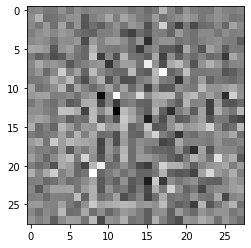

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Discriminator

In [ ]:
discriminator  = tf.keras.Sequential()
discriminator.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))
discriminator.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1))

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [ ]:
discriminator(generated_image)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.03343763]], dtype=float32)>

Loss

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Training

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
epochs = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

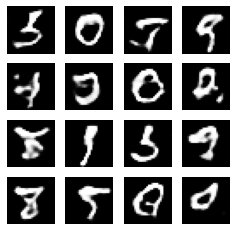

epoch = 50


In [ ]:
from IPython import display

for epoch in range(epochs):
  for image_batch in X:
    train_step(image_batch)
  predictions = generator(seed, training=False)

  display.clear_output(wait=True)
  fig = plt.figure(figsize=(4,4))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0], cmap='gray')
      plt.axis('off')    
  plt.savefig(str(epoch+1) + '.png')
  plt.show()
  print('epoch =', epoch+1)

In [ ]:
import imageio
anim_file = 'result.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  for i in range(epochs):
    filename = str(i+1) + '.png'
    image = imageio.imread(filename)
    writer.append_data(image)
  writer.append_data(image)

## SRGAN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, losses
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def res_block(x_in, n=64, k=3):
    x = layers.Conv2D(n, k, padding='same')(x_in)
    x = layers.BatchNormalization()(x)
    x = layers.PReLU(shared_axes=[1, 2])(x)
    x = layers.Conv2D(n, k, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x_in, x])
    return x

In [ ]:
def up_resolution(x_in, block_size=2):
    x = layers.Conv2D(256, 3, padding='same')(x_in)
    x = layers.Lambda(lambda x: tf.nn.depth_to_space(x, block_size=block_size))(x)
    return layers.PReLU(shared_axes=[1, 2])(x)

In [ ]:
x_in = layers.Input(shape=(None, None, 3))

x = layers.Conv2D(64,  9, padding='same')(x_in)
x = x_1 = layers.PReLU(shared_axes=[1, 2])(x)

for _ in range(5):
    x = res_block(x)

x = layers.Conv2D(64, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Add()([x_1, x])

x = up_resolution(x) # 2x
x = up_resolution(x) # 2x

x = layers.Conv2D(3, 9, padding='same')(x)
x = layers.Activation('sigmoid')(x)

generator = Model(x_in, x)

In [ ]:
X = np.random.rand(1, 24, 24, 3)
Y = generator(X)
y = Y.numpy()[0]

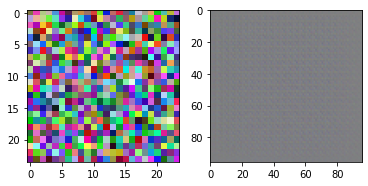

In [ ]:
plt.subplot(1,2,1)
plt.imshow(X[0])
plt.subplot(1,2,2)
plt.imshow(y)
plt.savefig('gen.png')
plt.show()

In [ ]:
def dis_block(x, n, k, s):
  x = layers.Conv2D(n, k, strides=s, padding='same')(x)
  x = layers.BatchNormalization()(x)
  return layers.LeakyReLU(alpha=0.2)(x)

In [ ]:
HR_size = 96   # Dense requires resolution
x_in = layers.Input(shape=(HR_size, HR_size, 3))

x = dis_block(x_in, 64, 3, 2)
x = dis_block(x, 128, 3, 1)
x = dis_block(x, 128, 3, 2)
x = dis_block(x, 256, 3, 1)
x = dis_block(x, 256, 3, 2)
x = dis_block(x, 512, 3, 1)
x = dis_block(x, 512, 3, 2)

x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
x = layers.LeakyReLU(alpha=0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = Model(x_in, x)

In [ ]:
discriminator(Y)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5000925]], dtype=float32)>

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

cross_entropy = losses.BinaryCrossentropy(from_logits=True)
mse = losses.MeanSquaredError()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

def vgg19(i=20):
    vgg = VGG19(input_shape=(None, None, 3), include_top=False, weights='imagenet')
    return Model(vgg.input, vgg.layers[i].output)

vgg = vgg19()

def generator_loss(sr_output):    
  return cross_entropy(tf.ones_like(sr_output), sr_output)

def content_loss(hr, sr, use_vgg=False):
  if use_vgg:
    hr = vgg(preprocess_input(hr * 255), training=False)
    sr = vgg(preprocess_input(sr * 255), training=False)
  return mse(hr, sr)

def perceptual_loss(con_loss, gen_loss, gen_loss_weight=1e-3):
  return con_loss + gen_loss_weight * gen_loss

def discriminator_loss(hr_out, sr_out):
  hr_loss = cross_entropy(tf.ones_like(hr_out), hr_out)
  sr_loss = cross_entropy(tf.zeros_like(sr_out), sr_out)
  return hr_loss + sr_loss

@tf.function
def train_step(lr, hr, use_vgg=False):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    lr = tf.cast(lr, tf.float32)
    hr = tf.cast(hr, tf.float32)

    sr = generator(lr, training=True)

    hr_output = discriminator(hr, training=True)
    sr_output = discriminator(sr, training=True)

    gen_loss = generator_loss(sr_output)
    con_loss = content_loss(hr, sr, use_vgg=use_vgg)
    perc_loss = perceptual_loss(con_loss, gen_loss)

    disc_loss = discriminator_loss(hr_output, sr_output)

  gradients_of_generator = gen_tape.gradient(perc_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return perc_loss, disc_loss

In [ ]:
from skimage.transform import rotate, resize

fn = 'frontal.jpg'
A = plt.imread(fn)
A = A / 255. 
A = np.float32(A)
A = resize(A, (A.shape[0]//3, A.shape[1]//3))

def gendata(A, N=32, HR_size=96, down_scale=4, show=False):
  # create small dataset from an image
  x = []
  y = []
  for i in range(N):
    temp = A.copy()
    temp = rotate(A, np.random.rand() * 10)
    if np.random.rand() > 0.5:
      temp = temp[::-1,:,:] # flipup
    if np.random.rand() > 0.5:
      temp = temp[:,::-1,:] # fliplr
    r = int(np.random.rand() * (temp.shape[0]-1-HR_size))
    c = int(np.random.rand() * (temp.shape[1]-1-HR_size))
    temp = temp[r:r+HR_size, c:c+HR_size]
    x.append(resize(temp, (HR_size//down_scale, HR_size//down_scale)))
    y.append(temp)
    if show:
      plt.subplot(1,2,1)
      plt.imshow(x[-1], interpolation='none')
      plt.subplot(1,2,2)
      plt.imshow(y[-1], interpolation='none')     
      plt.show()
  return  np.array(x), np.array(y)

In [ ]:
for data in range(50):
  LR, HR = gendata(A, N=32)
  for step in range(50):
    perc_loss, disc_loss = train_step(LR, HR, use_vgg=False)
  print(data, perc_loss.numpy(), disc_loss.numpy())

0 0.0070353406 1.0065844
1 0.004655586 1.0064751
2 0.003838421 1.0258176
3 0.0034196049 1.0064201
4 0.0033152718 1.006416
5 0.0028717024 1.0064149
6 0.0024933293 1.2675838
7 0.0027409599 1.3031957
8 0.0026289234 1.3862944
9 0.0028221232 1.0430666
10 0.002288254 1.3558367
11 0.0026469757 1.3862944
12 0.0023601525 1.3862944
13 0.0022329518 1.3862942
14 0.002186914 1.3862944
15 0.0021830145 1.3862944
16 0.0023800652 1.3862944
17 0.002210667 1.3862944
18 0.0021794816 1.3862944
19 0.0023335442 1.3862944
20 0.00221893 1.3862944
21 0.0021350128 1.3862944
22 0.0025593976 1.3862944
23 0.002018557 1.3862944
24 0.0016734485 1.3862944
25 0.002172709 1.3862944
26 0.0020624609 1.3862944
27 0.002324908 1.3862944
28 0.0018559851 1.3862944
29 0.0018006563 1.3862944
30 0.0020497167 1.3862944
31 0.00221926 1.3862944
32 0.0022098152 1.3862944
33 0.0017184658 1.3862944
34 0.0018892415 1.3862944
35 0.0019706786 1.3862944
36 0.0016286517 1.3862944
37 0.0018283905 1.3862944
38 0.0017297119 1.3862944
39 0.0016

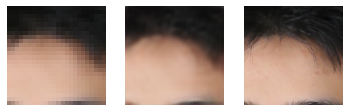

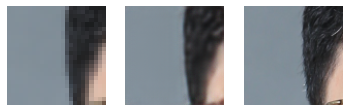

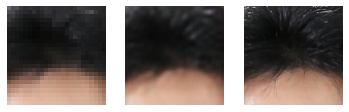

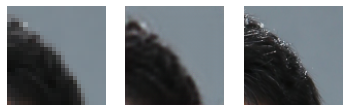

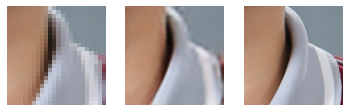

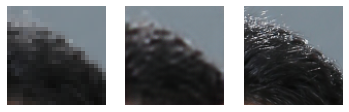

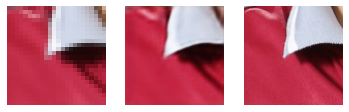

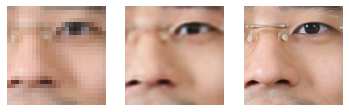

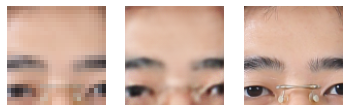

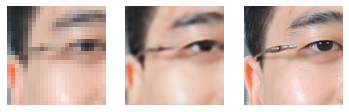

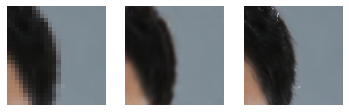

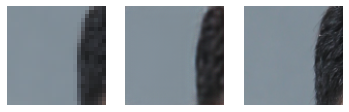

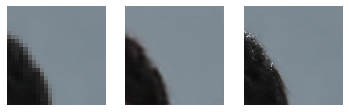

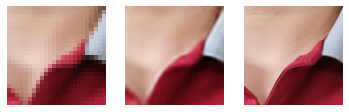

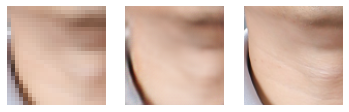

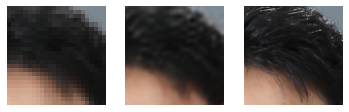

In [ ]:
N = 16
LR, HR = gendata(A, N=N)
SR = generator(LR, training=False)
for i in range(N):
  plt.subplot(1, 3, 1)
  plt.imshow(LR[i], interpolation='none')
  plt.axis('off')
  plt.subplot(1, 3, 2)
  plt.imshow(SR[i])
  plt.axis('off')
  plt.subplot(1, 3, 3)
  plt.imshow(HR[i])
  plt.axis('off')
  plt.show()

# BONUS (if time allows)

## Audio

In [ ]:
import librosa
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
y1, sr1 = librosa.load('sawasdee.m4a')
y2, sr2 = librosa.load('lakon.m4a')

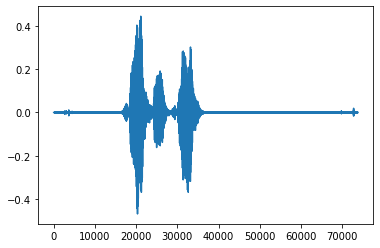

In [ ]:
plt.plot(y1)

In [ ]:
x1 = librosa.stft(y1)

In [ ]:
x1 = np.abs(x1)

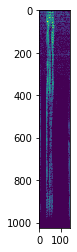

In [ ]:
plt.imshow(librosa.amplitude_to_db(x1))

In [ ]:
x2 = librosa.stft(y2)
y2 = np.abs(y2)

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


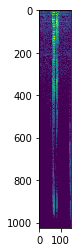

In [ ]:
plt.imshow(librosa.amplitude_to_db(x2))

In [ ]:
z1 = librosa.feature.mfcc(y1, sr1)
z2 = librosa.feature.mfcc(y2, sr2)

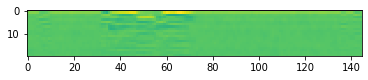

In [ ]:
plt.imshow(z1)

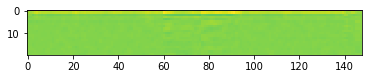

In [ ]:
plt.imshow(z2)

In [ ]:
z1.shape

(20, 145)

In [ ]:
z2.shape

(20, 148)

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import librosa

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
print('พูดเลย')
x = record(sec=2)

พูดเลย


<IPython.core.display.Javascript object>

In [ ]:
x

In [ ]:
x = np.array(x.get_array_of_samples(), np.float32)
x = librosa.feature.mfcc(x)
print(x.shape)

(20, 186)


In [ ]:
X = []
Y = []
names = ['ซ้าย', 'ขวา']

In [ ]:
def record_to_mfcc():
  print('พูดเลย')
  x = record(sec=2)
  x = np.array(x.get_array_of_samples(), np.float32)
  return librosa.feature.mfcc(x)

In [ ]:
for i in range(10):
  x = record_to_mfcc()
  print(x.shape)
  X.append(x)
  Y.append(names.index('ขวา'))

พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)
พูดเลย


<IPython.core.display.Javascript object>

(20, 186)


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

(20, 20, 186)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, 5, input_shape=(20, 186, 1), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, 5, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X[:,:,:,None], Y, epochs=20)

Train on 20 samples
Epoch 1/20
20/20 [==============================] - 7s 345ms/sample - loss: 91.4978 - acc: 0.4000
Epoch 2/20
20/20 [==============================] - 0s 374us/sample - loss: 256.5994 - acc: 0.5000
Epoch 3/20
20/20 [==============================] - 0s 356us/sample - loss: 64.2407 - acc: 0.3500
Epoch 4/20
20/20 [==============================] - 0s 335us/sample - loss: 69.5128 - acc: 0.6000
Epoch 5/20
20/20 [==============================] - 0s 333us/sample - loss: 51.3226 - acc: 0.5500
Epoch 6/20
20/20 [==============================] - 0s 331us/sample - loss: 13.7062 - acc: 0.6500
Epoch 7/20
20/20 [==============================] - 0s 354us/sample - loss: 21.5592 - acc: 0.7500
Epoch 8/20
20/20 [==============================] - 0s 379us/sample - loss: 38.5080 - acc: 0.5000
Epoch 9/20
20/20 [==============================] - 0s 360us/sample - loss: 19.5480 - acc: 0.6000
Epoch 10/20
20/20 [==============================] - 0s 344us/sample - loss: 10.0398 - acc: 0.650

In [ ]:
x = record_to_mfcc()
names[model.predict(x[None,:,:,None]).argmax()]

พูดเลย


<IPython.core.display.Javascript object>

'ขวา'

## Time-Series

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
Xtrain = np.array([1,2,3,4,5,6,7], np.float)

In [ ]:
def makedata(x, window = 3):
  X = []
  Y = []
  for i in range(len(x) - window):
    X.append(x[i:i+window])
    Y.append(x[i+window])
  X = np.array(X)
  Y = np.array(Y)
  return X, Y

In [ ]:
X, Y = makedata(Xtrain)
print(X)
print(Y)

[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]
[4. 5. 6. 7.]


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001),
              loss='mse') 

In [ ]:
model.fit(X, Y, epochs=1000)

Train on 14 samples
Epoch 1/1000
14/14 [==============================] - 0s 14ms/sample - loss: 7457.7397
Epoch 2/1000
14/14 [==============================] - 0s 226us/sample - loss: 87.0867
Epoch 3/1000
14/14 [==============================] - 0s 317us/sample - loss: 2.3067
Epoch 4/1000
14/14 [==============================] - 0s 303us/sample - loss: 0.7290
Epoch 5/1000
14/14 [==============================] - 0s 273us/sample - loss: 0.7054
Epoch 6/1000
14/14 [==============================] - 0s 278us/sample - loss: 0.7051
Epoch 7/1000
14/14 [==============================] - 0s 279us/sample - loss: 0.7051
Epoch 8/1000
14/14 [==============================] - 0s 288us/sample - loss: 0.7051
Epoch 9/1000
14/14 [==============================] - 0s 300us/sample - loss: 0.7051
Epoch 10/1000
14/14 [==============================] - 0s 300us/sample - loss: 0.7051
Epoch 11/1000
14/14 [==============================] - 0s 284us/sample - loss: 0.7050
Epoch 12/1000
14/14 [===================

In [ ]:
model.predict(X)

array([[75.08313 ],
       [75.0647  ],
       [74.05284 ],
       [74.275345],
       [73.18537 ],
       [73.344826],
       [72.768364],
       [73.450714],
       [73.0919  ],
       [73.43523 ],
       [74.48699 ],
       [74.033035],
       [74.99272 ],
       [74.68454 ]], dtype=float32)

In [ ]:
Xtest= np.array([8, 9, 10, 11], np.float)
X, Y = makedata(Xtest)
print(X)
print(Y)

[[ 8.  9. 10.]]
[11.]


In [ ]:
model.predict(X)

array([[10.935084]], dtype=float32)

In [ ]:
!pip install requests_html
!pip install yahoo_fin
!pip install parinya

     |████████████████████████████████| 1.2MB 9.5MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=a6413b6e490109d0fd016dcee12ac115ddbb97111bb1c3191af7d9a09fbc8254
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for pyppeteer: filename=pyppeteer-0.0.25-cp36-none-any.whl size=78362 sha256=295974395c0c2560c3d41294384a38e9185e1fca1e97c92284a2dacbcf8b6a4a
  Stored in directory: /root/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
  Created wheel for parse: filename=parse-1.14.0-cp36-none-any.whl size=23463 sha256=17675d2c26250a277e7d1f3065dc48e64b8e583d2ec43f22af516ba631cd6c9f
  Stored in directory: /root/.cache/pip/wheels/d7/07/e0/b74bfdc1d434e73ef79e69e301e82a7825e0c070f7442beb61
Successfully built fake-useragent pyppeteer parse


In [ ]:
import parinya.stock as stk

In [ ]:
s = stk.getHistStock('CPALL.BK', day_begin='01-12-2019', day_end='27-12-2019')

In [ ]:
print(s)

             Open   High    Low  Close  Adj Close      Volume
Date                                                         
2019-12-02  76.00  76.25  74.25  75.00      75.00  23129000.0
2019-12-03  74.25  75.50  74.25  75.25      75.25  19929400.0
2019-12-04  75.00  75.75  74.75  75.25      75.25  11597100.0
2019-12-06  75.25  76.00  74.75  75.00      75.00  25117000.0
2019-12-09  75.00  75.25  72.50  73.25      73.25  40221300.0
2019-12-11  73.50  74.50  73.25  73.50      73.50  24748500.0
2019-12-12  74.00  74.50  73.25  73.25      73.25  26652000.0
2019-12-13  73.75  74.25  73.25  73.25      73.25  21583300.0
2019-12-16  73.50  73.50  72.00  72.50      72.50  20828400.0
2019-12-17  73.00  73.75  72.25  73.50      73.50  30289200.0
2019-12-18  74.25  74.25  73.00  73.75      73.75  17860300.0
2019-12-19  73.50  73.75  72.50  73.50      73.50  23172900.0
2019-12-20  73.50  75.00  73.25  75.00      75.00  37728300.0
2019-12-23  75.00  75.75  74.50  74.75      74.75  22844600.0
2019-12-

In [ ]:
s['Close'].values

array([75.  , 75.25, 75.25, 75.  , 73.25, 73.5 , 73.25, 73.25, 72.5 ,
       73.5 , 73.75, 73.5 , 75.  , 74.75, 75.  , 74.75, 75.  ],
      dtype=float32)

In [ ]:
X, Y = makedata(s['Close'].values)
print(X)
print(Y)

[[75.   75.25 75.25]
 [75.25 75.25 75.  ]
 [75.25 75.   73.25]
 [75.   73.25 73.5 ]
 [73.25 73.5  73.25]
 [73.5  73.25 73.25]
 [73.25 73.25 72.5 ]
 [73.25 72.5  73.5 ]
 [72.5  73.5  73.75]
 [73.5  73.75 73.5 ]
 [73.75 73.5  75.  ]
 [73.5  75.   74.75]
 [75.   74.75 75.  ]
 [74.75 75.   74.75]]
[75.   73.25 73.5  73.25 73.25 72.5  73.5  73.75 73.5  75.   74.75 75.
 74.75 75.  ]


In [ ]:
model.fit(X, Y)

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 1.6119


In [ ]:
Z = model.predict(X)

In [ ]:
from matplotlib import pyplot as plt

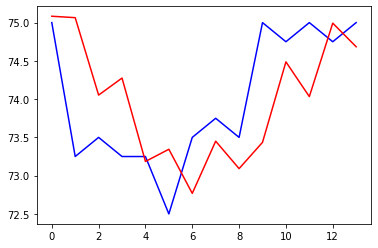

In [ ]:
plt.plot(Y, 'b')
plt.plot(Z, 'r')

## Text

### Term Frequency

In [ ]:
!pip install attacut

In [ ]:
from attacut import tokenize

In [ ]:
tokenize('ฉันหิวข้าว')

['ฉัน', 'หิว', 'ข้าว']

In [ ]:
Xtrain = ['“บิ๊กตู่” ให้กำลังใจ จนท.บำราศนราดูร ขอหนักนิดเบาหน่อยพูดกันดีๆ พร้อมปรับแก้',
          'รัฐบาลไฟเขียวต่ออายุราชการ อธิบดีกรมอุทยานแห่งชาติฯ อีก 1 ปี',
          '“บิ๊กป้อม” รับปากเคลียร์ “สิระ-ไผ่” ปะทะเดือดไลน์ พปชร.ยันทำงานกับ ปชป.ได้',
          'จ่อเซ็นแมนฯยู!! “จู๊ด เบลลิงแฮม” วันเดอร์คิดเบอร์มิงแฮม พร้อมครอบครัวบุกสนามซ้อมแคร์ริงตัน',
          '“จิ้งจอก” เลิกบู่ “วาร์ดี-บาร์นส” คนละ 2 เม็ด ถลุงวิลล่ายับ 4-0',
          '“ลิเวอร์พูล” นับถอยหลัง 5 วัน ฉลองแชมป์ที่บ้าน “เอฟเวอร์ตัน”'
          ]
Ytrain = ['การเมือง',
          'การเมือง',
          'การเมือง',
          'กีฬา',
          'กีฬา',
          'กีฬา'
          ]
Xtest = ['“อิทธิพล” ยัน คน พปชร.พี่น้องกัน เคลียร์กันได้ หลังไลน์เดือดปมหน้ากาก',
         '“บิ๊กป้อม” รับปากเคลียร์ “สิระ-ไผ่” ปะทะเดือดไลน์ พปชร.ยันทำงานกับ ปชป.ได้',
         '“ลิเวอร์พูล” นับถอยหลัง 5 วัน ฉลองแชมป์ที่บ้าน “เอฟเวอร์ตัน”',
         'เงินเหลือๆ “ฟลอยด์” ปล่อยวาทะเด็ดพร้อมฮุบกิจการ “นิวคาสเซิล”']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
count_vect = CountVectorizer(tokenizer=tokenize)

In [ ]:
Xtrain_count = count_vect.fit_transform(Xtrain)

In [ ]:
Xtrain_count.shape

(6, 85)

In [ ]:
Xtrain_count[0].toarray()

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]])

In [ ]:
tf_transformer = TfidfTransformer(use_idf=False)

In [ ]:
tf_transformer.fit(Xtrain_count)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=False)

In [ ]:
Xtrain_tf = tf_transformer.transform(Xtrain_count)

In [ ]:
Xtrain_tf.shape

(6, 85)

In [ ]:
Xtrain_tf[0].toarray()

array([[0.69631062, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17407766, 0.        , 0.17407766, 0.17407766,
        0.        , 0.        , 0.        , 0.        , 0.17407766,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17407766, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.17407766,
        0.17407766, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17407766, 0.        , 0.        , 0.        ,
        0.17407766, 0.17407766, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17407766, 0.17407766, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### Naïve Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(Xtrain_tf, Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Xtest_count = count_vect.transform(Xtest)

In [ ]:
Xtest_tf = tf_transformer.transform(Xtest_count)

In [ ]:
clf.predict(Xtest_tf)

array(['การเมือง', 'การเมือง', 'กีฬา', 'กีฬา'], dtype='<U8')

### Word2Vec

In [ ]:
import gdown
import tensorflow as tf
from tensorflow import keras
import numpy as np
import re

In [ ]:
gdown.download('https://drive.google.com/uc?id=0B0ZXk88koS2KV1FJN0xRX1FxaFE&export=download', 'th.zip', quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=0B0ZXk88koS2KV1FJN0xRX1FxaFE&export=download
To: /content/th.zip
122MB [00:01, 80.9MB/s]


'th.zip'

In [ ]:
!unzip th.zip

Archive:  th.zip
  inflating: th.bin                  
  inflating: th.tsv                  


In [ ]:
with open('th.tsv') as f:
  vocab = []
  W = None
  vec = ''
  for line in f.readlines():
    temp = line.split('\t')
    if len(temp) == 3:
      vocab.append(temp[1])
      if int(temp[0]) % 1000 == 0:
        print('\r' + temp[0], end='')
      wordvector = np.fromstring(re.sub('\s+', ' ', vec)[1:-1], sep=' ', dtype=np.float32)
      if len(wordvector) > 0:
        if W is None:
          W = wordvector.copy()
        else:
          W = np.vstack((W, wordvector))
      vec = temp[-1]
    elif len(temp) == 1:
      vec += temp[-1]
  W = np.vstack((W, wordvector))
print('\n')
print(len(vocab))
print(W.shape)

0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  # This is added back by InteractiveShellApp.init_path()


30000

30225
(30225, 300)


In [ ]:
def sent2idx(x):
  xidx = []
  for w in tokenize(x):
    if w in vocab:
      xidx.append(vocab.index(w))
  return np.array(xidx)

In [ ]:
sent2idx(Xtrain[0])

array([  19, 3628,  393,  982, 2693,  345,   41,   78,   95,  344,  787,
        878])

In [ ]:
Xtrain_idx = []
maxlen = 0
for x in Xtrain:
  Xtrain_idx.append(sent2idx(x))
  if len(Xtrain_idx[-1]) > maxlen:
    maxlen = len(Xtrain_idx[-1])
  print(len(Xtrain_idx[-1]))

12
9
10
8
7
9


In [ ]:
print(maxlen)

12


In [ ]:
vocab[0]

'ที่'

In [ ]:
vocab = [''] + vocab
print(len(vocab))

30226


In [ ]:
vocab[0]

''

In [ ]:
W = np.vstack((np.random.rand(*W[0].shape), W))

In [ ]:
W.shape

(30226, 300)

In [ ]:
Xtrain_idx

[array([  19, 3628,  393,  982, 2693,  345,   41,   78,   95,  344,  787,
         878]),
 array([ 382,   42,  350,  475, 2740,  113, 1142,   77,   22]),
 array([12336,  7257, 27765,  2326,  2986,    68,    62,    15, 17788,
            9]),
 array([11996,   497,   497,   464,   344,   771,  1493,   386]),
 array([ 1660,  7558,    31,   609,  2971,  9946, 12867]),
 array([ 474, 2881,   84,   29, 1348,  273,    1,  128,  506])]

In [ ]:
for i, x in enumerate(Xtrain_idx):
  if len(x) < maxlen:
    Xtrain_idx[i] = np.hstack((x, np.zeros(maxlen-len(x))))
Xtrain_idx = np.array(Xtrain_idx)

In [ ]:
Xtrain_idx.shape

(6, 12)

### LSTM

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(W.shape[0], W.shape[1], name='embed'))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(8, return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(4)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2))

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=1e-4))

In [ ]:
model.get_layer('embed').set_weights([W])
model.get_layer('embed').trainable = False

In [ ]:
model.fit(Xtrain_idx, np.array([0,0,0,1,1,1]), epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 808us/step - loss: 0.6931
Epoch 2/10
1/1 [==============================] - 0s 724us/step - loss: 0.6931
Epoch 3/10
1/1 [==============================] - 0s 715us/step - loss: 0.6931
Epoch 4/10
1/1 [==============================] - 0s 692us/step - loss: 0.6931
Epoch 5/10
1/1 [==============================] - 0s 721us/step - loss: 0.6931
Epoch 6/10
1/1 [==============================] - 0s 764us/step - loss: 0.6931
Epoch 7/10
1/1 [==============================] - 0s 689us/step - loss: 0.6931
Epoch 8/10
1/1 [==============================] - 0s 703us/step - loss: 0.6931
Epoch 9/10
1/1 [==============================] - 0s 795us/step - loss: 0.6931
Epoch 10/10
1/1 [==============================] - 0s 782us/step - loss: 0.6931


In [ ]:
model.predict(Xtrain_idx).argmax(axis=1)

array([0, 0, 0, 0, 0, 0])

In [ ]:
Xtest_idx = []
for x in Xtest:
  Xtest_idx.append(sent2idx(x))
  if len(Xtest_idx[-1]) > maxlen:
    Xtest_idx[-1] =  Xtest_idx[-1][:maxlen]
  else:
    Xtest_idx[-1] = np.hstack((Xtest_idx[-1], np.zeros(maxlen-len(Xtest_idx[-1]))))
Xtest_idx = np.array(Xtest_idx)

In [ ]:
Xtest_idx.shape

(4, 12)

In [ ]:
model.predict(Xtest_idx).argmax(axis=1)

array([0, 0, 0, 0])